# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style()

# Loading dataset

In [2]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\car\\cardata.csv')
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
# stastical info
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [5]:
# getting info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Getting the null value
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# correlation matrix

<AxesSubplot:>

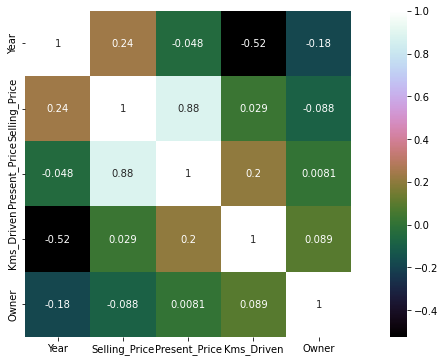

In [7]:
data_corr=data.corr(method='pearson')
plt.figure(figsize=(14,6))
sns.heatmap(data_corr,vmax=1,square=True,annot=True,cmap='cubehelix')

# Data exploratory

Text(0.5, 1.0, 'Sellig price vs Owner')

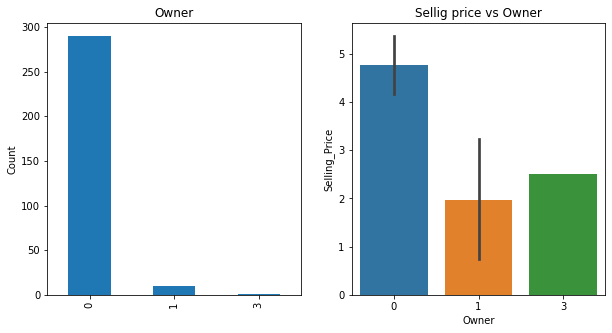

In [9]:
fig , ax  =plt.subplots(1,2 ,figsize =(10,5))

data["Owner"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Owner")
ax[0].set_ylabel("Count")


sns.barplot(data =data ,x ="Owner" ,y ="Selling_Price"  ,ax =ax[1] )
ax[1].set_title("Sellig price vs Owner")

Text(0.5, 1.0, 'Selling state acc to transmission')

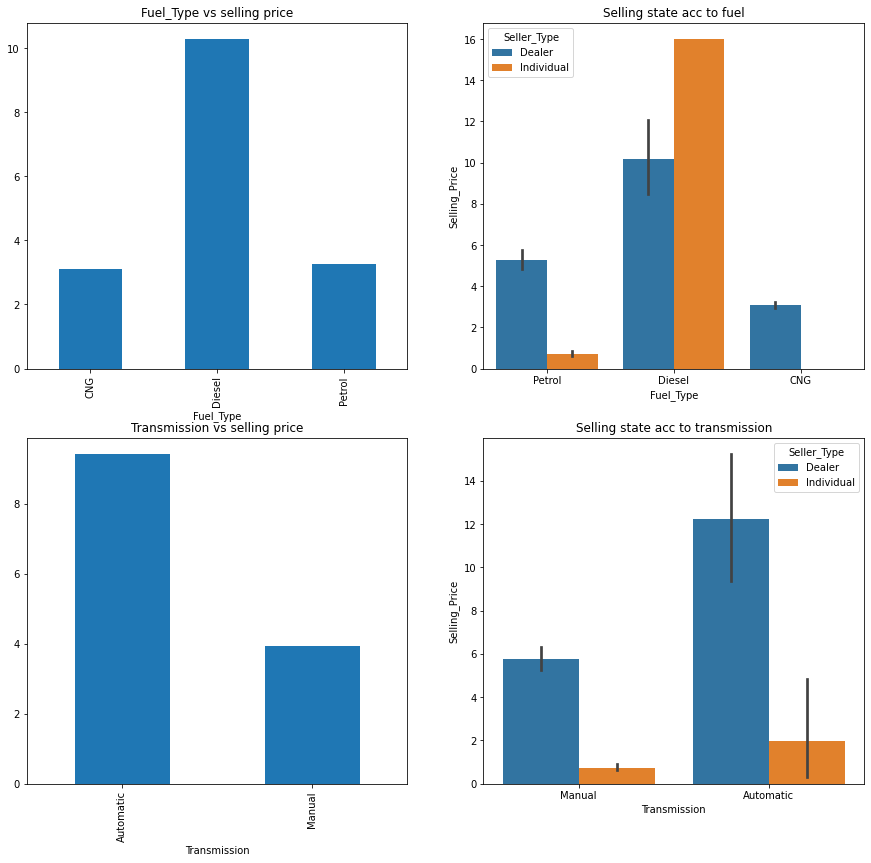

In [10]:
fig , ax  =plt.subplots(2,2 ,figsize =(15,14))

data[["Fuel_Type" ,"Selling_Price"]].groupby('Fuel_Type')["Selling_Price"].mean().plot.bar(ax= ax[0][0])
ax[0][0].set_title("Fuel_Type vs selling price")

sns.barplot(data =data ,x ="Fuel_Type" ,y ="Selling_Price" ,hue ="Seller_Type" ,ax =ax[0][1])
ax[0][1].set_title("Selling state acc to fuel")

data[["Transmission" ,"Selling_Price"]].groupby('Transmission')["Selling_Price"].mean().plot.bar(ax= ax[1][0])
ax[1][0].set_title("Transmission vs selling price")

ax[1][1] =sns.barplot(data =data ,x ="Transmission" ,y ="Selling_Price" ,hue ="Seller_Type")
ax[1][1].set_title("Selling state acc to transmission")

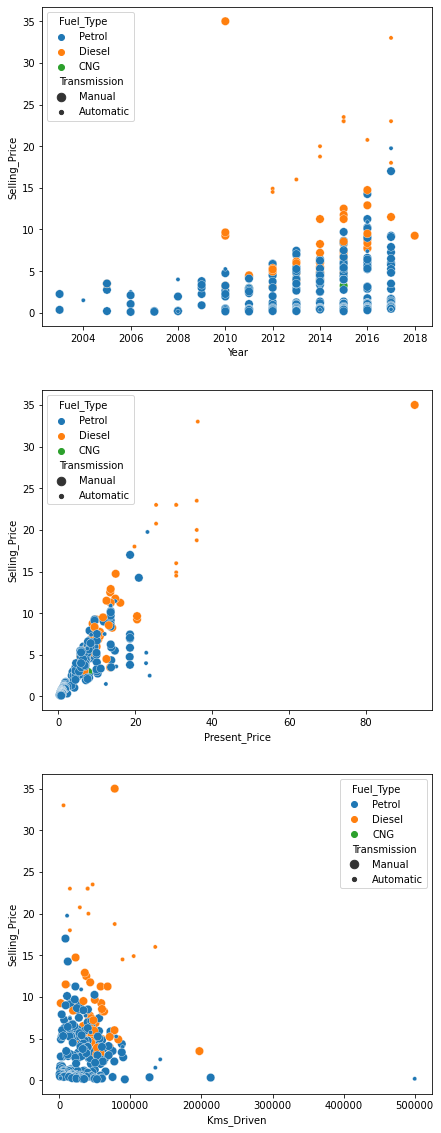

In [11]:
columns =['Year',  'Present_Price', 'Kms_Driven']
fig ,ax =plt.subplots(3,1 ,figsize =(7,20))
i=0
for column in columns:
    sns.scatterplot(data =data ,x =column ,y ="Selling_Price"  ,hue ="Fuel_Type",size ="Transmission",ax =ax[i])
    i+=1